In [1]:
import sys
sys.path.append("..")
sys.path.append("../data")

# general modules
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from datetime import date


# Use paper style
plt.style.use(os.path.join('..','climatic_change.mplstyle'))

In [2]:
## First load the data

# Pathway extension methods
results_extension = pd.read_excel('../data/cat_output/210309_range_p5_proc_CAT_EU27.xlsx')

# Scenario inference methods
results_inference_1pt5 = pd.read_csv('../data/cat_output/CAT_Scenario_inference results_1pt5C_24032021.csv')
results_inference_2 = pd.read_csv('../data/cat_output/CAT_Scenario_inference results_2C_24032021.csv')

# country lists
valid_countries = results_inference_2['country']
valid_countries = valid_countries.loc[valid_countries != 'EU27']
valid_countries

# historic data
hist = pd.read_csv('../data/input/Historic_data_per_country_EU27.csv')
hist = hist.loc[hist['Country'].isin(valid_countries)]
hist = hist.set_index('Country')
# hist

# Set the same countries elsehwere too
results_inference_2 = results_inference_2.loc[results_inference_2['country'].isin(valid_countries)]
results_inference_1pt5 = results_inference_1pt5.loc[results_inference_1pt5['country'].isin(valid_countries)]
results_extension = results_extension.loc[results_extension['region'].isin(valid_countries)]

In [3]:
## clean and prep the data
#  We want to compare 2030 results for 1pt5 and 2c. 

results_extension_1pt5 = results_extension.loc[(results_extension['scenario'] == '2100_GMT<1.5C@P0.5') &
                                              (results_extension['region'].isin(valid_countries))]
results_extension_1pt5 = results_extension_1pt5.set_index('region')

results_extension_2 = results_extension.loc[(results_extension['scenario'] == 'peak_GMT<2.0C@P0.66') &
                                              (results_extension['region'].isin(valid_countries))]
results_extension_2 = results_extension_2.set_index('region')

results_inference_2 = results_inference_2.set_index('country')
results_inference_1pt5 = results_inference_1pt5.set_index('country')

### Calculate aggregate emissions in each year

In [4]:
# Calculate the sum of emissions in a specific year

target_yr_inf = '2030'
target_yr_ext = '2030_allowances'

# 1.5C levels
agg_Ext_1pt5 = results_extension_1pt5[target_yr_ext].sum()
agg_Inf_1pt5 = results_inference_1pt5[target_yr_inf].sum() 
print('For 1.5C the aggregate emissions are:')
print('Extension: ' + str(agg_Ext_1pt5/1000))
print('Inference: ' + str(agg_Inf_1pt5/1000))

# 2C levels
agg_Ext_2 = results_extension_2[target_yr_ext].sum()
agg_Inf_2 = results_inference_2[target_yr_inf].sum() 
print('-------------------')
print('For 2C:')
print('Extension: ' + str(agg_Ext_2/1000))
print('Inference: ' + str(agg_Inf_2/1000))


For 1.5C the aggregate emissions are:
Extension: 32.7488387593494
Inference: 32.713449999999995
-------------------
For 2C:
Extension: 39.32157485416657
Inference: 39.31936999999999


### Make a plot

C:\Users\Louise\source\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


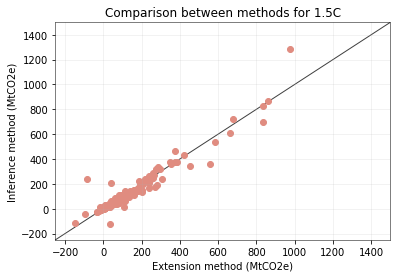

In [11]:
## Plot comparison

dataToPlot = pd.concat([results_extension_1pt5[target_yr_ext], results_inference_1pt5[target_yr_inf]], axis =1)

# simple plot
fig, ax = plt.subplots()
plt.scatter(dataToPlot['2030_allowances'], dataToPlot['2030'])

# reduce x/y lines to compare bulk of countries. 
plt.xlim([-250, 1500])
plt.ylim([-250, 1500])

# add x=y line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

# add some labels
plt.xlabel('Extension method (MtCO2e)')
plt.ylabel('Inference method (MtCO2e)')
plt.title('Comparison between methods for 1.5C')
#dataToPlot['Difference'] = dataToPlot['2030_allowances'] - dataToPlot['2030']

filename = 'Figure_N_temperature_assessment_comparison_2030_1pt5_details'
outputdir = os.path.join('..', 'figures')
if not os.path.exists(outputdir):
    os.makedirs(outputdir)

fullfilename = os.path.join(outputdir, filename)

plt.savefig(fullfilename, dpi=350)


In [10]:
## Plot comparison - 2C

dataToPlot = pd.concat([results_extension_1pt5[target_yr_ext], results_inference_1pt5[target_yr_inf]], axis =1)

# simple plot
fig, ax = plt.subplots()
plt.scatter(dataToPlot['2030_allowances'], dataToPlot['2030'])

# reduce x/y lines to compare bulk of countries. 
plt.xlim([-250, 400])
plt.ylim([-250, 400])

# add x=y line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

# add some labels
plt.xlabel('Extension method (MtcO2)')
plt.ylabel('Inference method (MtCO2)')
plt.title('Comparison between methods for 2C')
#dataToPlot['Difference'] = dataToPlot['2030_allowances'] - dataToPlot['2030']

C:\Users\Louise\source\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Comparison between methods for 2C')

C:\Users\Louise\source\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Comparison between methods for 1.5C')

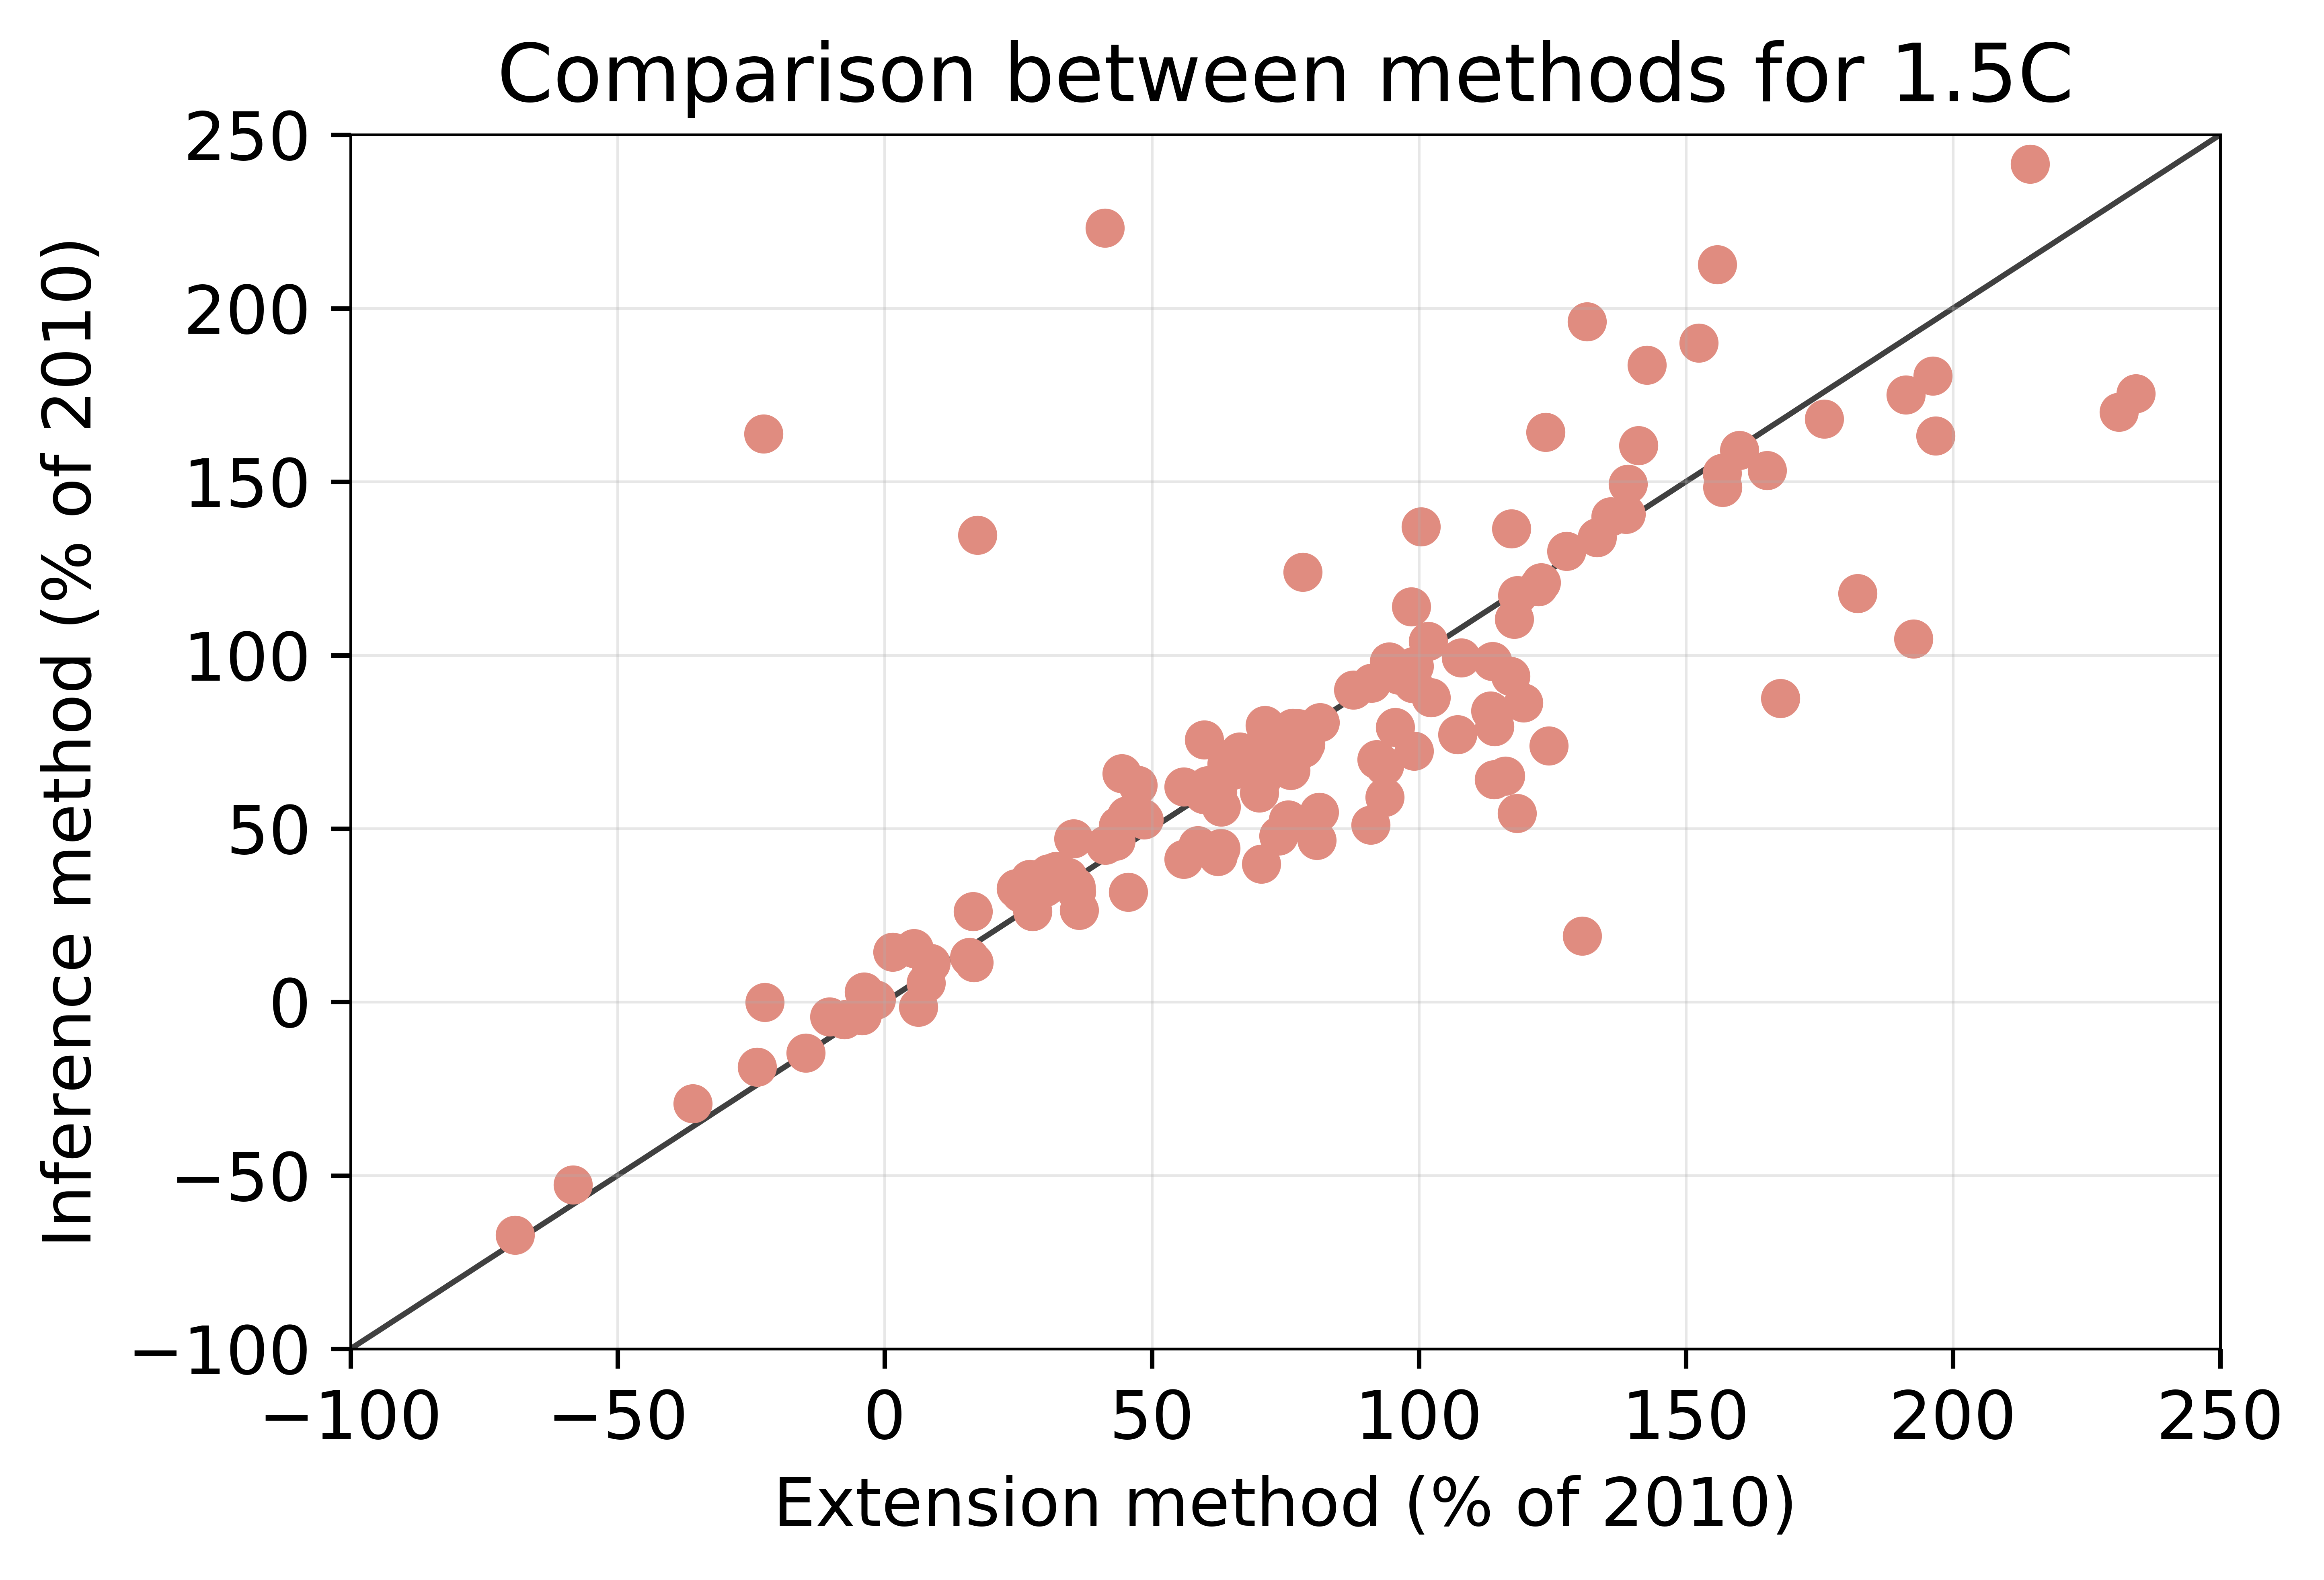

In [11]:
# Plot in % below 2010 instead? 

results_extension_1pt5 = results_extension_1pt5.rename_axis('country')
#results_extension_1pt5 = results_extension_1pt5.rename(index={'region': 'country'})
# results_extension_1pt5 = results_extension_1pt5.set_index('country')


dataToPlot_b2010 = pd.concat([results_extension_1pt5[target_yr_ext], 
                              results_inference_1pt5[target_yr_inf], 
                              hist['2010']],                  
                              axis=1)

dataToPlot_b2010 = dataToPlot_b2010.dropna()

dataToPlot_b2010['2030_allowances'] = 100*dataToPlot_b2010['2030_allowances'] / dataToPlot_b2010['2010']
dataToPlot_b2010['2030'] = 100* dataToPlot_b2010['2030'] / dataToPlot_b2010['2010']

fig, ax = plt.subplots()
plt.scatter(dataToPlot_b2010['2030_allowances'], dataToPlot_b2010['2030'])

# reduce x/y lines to compare bulk of countries. 
# plt.xlim([-1000, 3000])
# plt.ylim([-1000, 3000])

plt.xlim([-100, 250])
plt.ylim([-100, 250])


# add x=y line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

# add some labels
plt.xlabel('Extension method (% of 2010)')
plt.ylabel('Inference method (% of 2010)')
plt.title('Comparison between methods for 1.5C')

### Calculate differences

In [17]:
## How big are the differences? For which countries do you get the biggest differences?

pd_diff = 100 * ((results_inference_1pt5[target_yr_inf] - results_extension_1pt5[target_yr_ext])) / results_extension_1pt5[target_yr_ext]

# unusual = pd_diff.loc[pd_diff > 0]
# unusual.sort_values(ascending = False)




FIN    850.654352
GRD    673.317713
SDN    441.411097
NLD    182.954066
TJK     86.941994
GUY     58.459917
SVN     57.846813
CMR     50.580492
KHM     49.139680
CYP     48.434452
TCD     41.042555
ARM     36.556927
MRT     36.382815
ISL     33.459311
LVA     32.849052
BLZ     32.740385
RUS     31.812934
HRV     30.537022
BRN     29.459786
KGZ     28.716976
MNE     26.320269
MAR     24.681802
HUN     23.823789
JPN     22.429824
GRC     20.619029
CZE     19.305801
POL     18.461065
UGA     17.483071
ROU     17.183103
COD     16.538894
          ...    
BGR     10.815203
SVK     10.138024
MAC      9.794316
UKR      9.687930
NZL      9.371278
BHR      8.631661
AUS      8.372177
ZAF      7.298309
IRQ      7.288190
CAN      7.231325
NGA      6.659841
PRT      4.955116
BEN      4.427801
SLE      4.262155
ALB      3.912757
GHA      3.836734
SRB      3.427436
ARG      3.251959
LKA      2.933948
URY      2.804461
MEX      2.678242
KAZ      2.601894
NAM      2.248015
CHN      1.852412
VNM      1

Text(0.5, 0, '%')

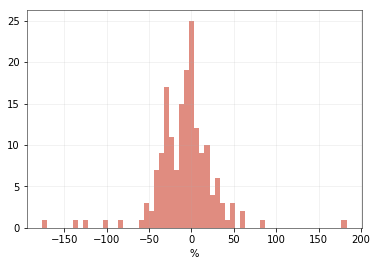

In [18]:
#n_over_15 = len(
# countryToCheck = 'NOR'
# print("Checking " + countryToCheck)
# print(results_inference_1pt5.loc[countryToCheck])
# print(results_extension_1pt5.loc[countryToCheck])

plt.hist(pd_diff.loc[(pd_diff > -200) & (pd_diff < 200)] , bins=60)
plt.xlabel("%")

In [ ]:
## Check using the reduction below reference method

pd_diff2 = dataToPlot_b2010['2030'] - dataToPlot_b2010['2030_allowances']

positive = pd_diff2.loc[pd_diff2 < -300]
positive

# Playground

In [ ]:
results_extension['scenario'].unique()

In [ ]:
results_inference_1pt5

In [ ]:
LULUCF = 1133
Shipping = 998
Aviation = 718

Bunkers = Aviation + Shipping

non_country_emissions = LULUCF + Shipping + Aviation
print("Total non-country emissions in 2030 are: " + str(non_country_emissions))
print("Bunkers emissions in 2030 are: " + str(Bunkers))